In [1]:
%matplotlib inline
import mglearn

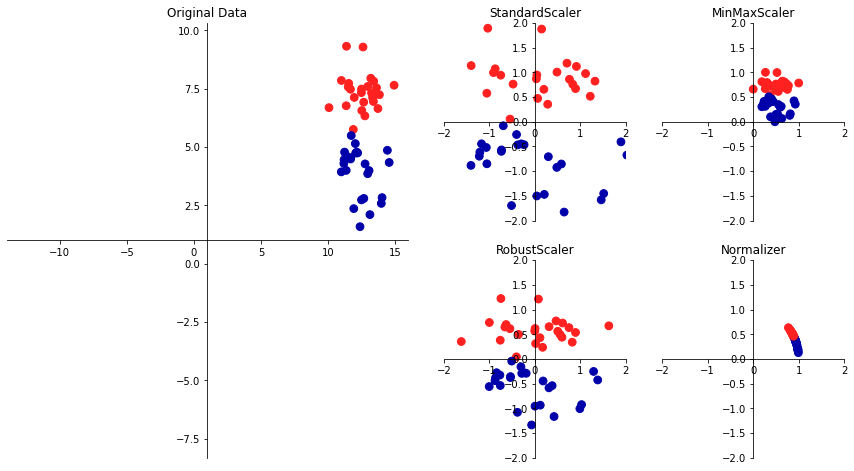

In [2]:
mglearn.plots.plot_scaling()
# minmax 0과 1사이의 데이터
# robust: x-중간값 / 3 사분위 - 1 사분위
# normalizer: 데이터 포인트: 데이터 특성

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [7]:
x_train_scaled = scaler.transform(x_train) # fit_transform()
print('변환된 후 크기:', x_train_scaled.shape)
print('스케일 조정 전 특성별 최소값:', x_train.min(axis=0))
print('스케일 조정 전 특성별 최대값:', x_train.max(axis=0))

print('스케일 조정 후 특성별 최소값:', x_train_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:', x_train_scaled.max(axis=0))

변환된 후 크기: (426, 30)
스케일 조정 전 특성별 최소값: [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
스케일 조정 전 특성별 최대값: [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
스케일 조정 후 특성별 최소값: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
스케일 조정 후 특성별 최대값: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
x_test_scaled = scaler.transform(x_test) # fit_transform()

print('스케일 조정 후 특성별 최소값:', x_test_scaled.min(axis=0))
print('스케일 조정 후 특성별 최대값:', x_test_scaled.max(axis=0))

스케일 조정 후 특성별 최소값: [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
스케일 조정 후 특성별 최대값: [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


train: 0-1
test: 0~1.x

(x-min) / (xmax - xmin)

In [9]:
# QuantileTransfromer
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import QuantileTransformer, StandardScaler, PowerTransformer

In [10]:
x, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
print(x.shape)

(50, 2)


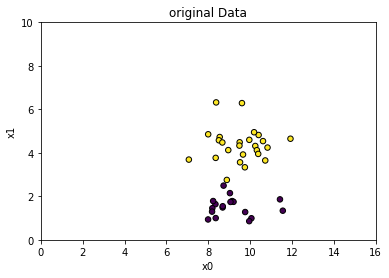

In [11]:
plt.scatter(x[:, 0], x[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0,16)
plt.ylim(0, 10)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('original Data')
plt.show()

/Users/kangjuhyun/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2367: UserWarning: n_quantiles (1000) is greater than the total number of samples (50). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


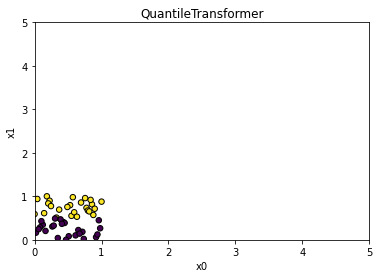

In [17]:
scaler = QuantileTransformer() # default 1000

x_trans = scaler.fit_transform(x)

plt.scatter(x_trans[:, 0], x_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

In [18]:
print(scaler.quantiles_.shape)

(50, 2)


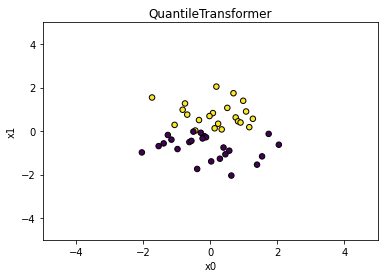

In [19]:
# 균등 분포 -> 정규분포
scaler = QuantileTransformer(n_quantiles=50, output_distribution='normal') # default 1000

x_trans = scaler.fit_transform(x)

plt.scatter(x_trans[:, 0], x_trans[:,1], c=y, s=30, edgecolors='black')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.xlabel('x0')
plt.ylabel('x1')
plt.title(type(scaler).__name__)
plt.show()

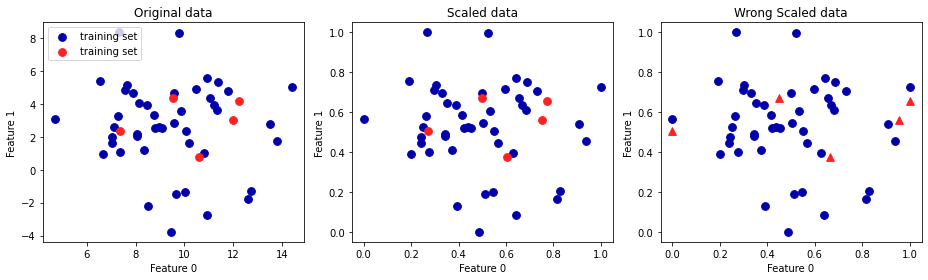

In [20]:
from sklearn.datasets import make_blobs
# 인위적인 데이터셋 생성
make_blobs()
x, _ = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=2)
x_train, x_test = train_test_split(x, random_state=1, test_size=0.1)

fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(x_train[:,0], x_train[:, 1], c=mglearn.cm2.colors[0], label='training set', s= 60)
axes[0].scatter(x_test[:,0], x_test[:, 1], c=mglearn.cm2.colors[1], label='training set', s= 60)
axes[0].legend(loc='upper left')
axes[0].set_title('Original data')

# scaled data
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train) # fit와 scaled를 한번에
x_test_scaled = scaler.transform(x_test)

axes[1].scatter(x_train_scaled[:,0], x_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='training set', s= 60)
axes[1].scatter(x_test_scaled[:,0], x_test_scaled[:, 1], c=mglearn.cm2.colors[1], label='training set', s= 60)
axes[1].set_title('Scaled data')

# 테스트 세트에 별도의 Scaler 사용 / 사용하지 말도록 하자
test_scaler = MinMaxScaler()
x_test_scaled_badly = test_scaler.fit_transform(x_test)

axes[2].scatter(x_train_scaled[:,0], x_train_scaled[:, 1], c=mglearn.cm2.colors[0], label='training set', s= 60)
axes[2].scatter(x_test_scaled_badly[:,0], x_test_scaled[:, 1], marker='^', c=mglearn.cm2.colors[1], label='training set', s= 60)
axes[2].set_title('Wrong Scaled data')

for ax in axes:
    ax.set_xlabel('Feature 0')
    ax.set_ylabel('Feature 1')
fig.tight_layout()

In [21]:
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)

print(x_train.shape)
print(x_test.shape)

(426, 30)
(143, 30)


In [22]:
svm = SVC(C=100)
svm.fit(x_train, y_train) # predict -> accuracy_score
print('테스트 세트 정확도: {:.2f}'.format(svm.score(x_test, y_test)))

테스트 세트 정확도: 0.94


In [23]:
# MinMaxScaler -> 0~1 스케일로 조정
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm.fit(x_train_scaled, y_train)
print('테스트 세트 정확도: {:.5f}'.format(svm.score(x_test_scaled, y_test)))

테스트 세트 정확도: 0.97203


In [24]:
# 평균 0, 분산 1을 갖도록 scale을 조정 -> Standard Scaler 공식 : ((x-평균) / 표준편차)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

svm.fit(x_train_scaled, y_train)
print('테스트 세트 정확도: {:.5f}'.format(svm.score(x_test_scaled, y_test)))

테스트 세트 정확도: 0.96503


In [25]:
## http://archive.ics.uci.edu/ml/index.php